In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('KNN_Project_Data')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


The data has a lot of variation in rage and can use standardization. we will be using sklearn Standard Scaler for this puropse

C:\Users\Parul\AppData\Local\Temp\ipykernel_20116\3757994621.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df,bins=50)


<Axes: ylabel='Density'>

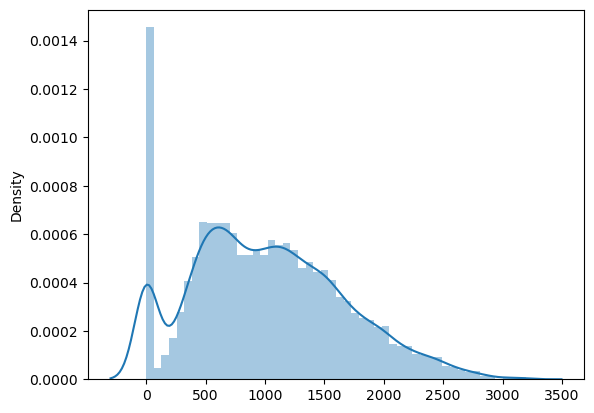

In [18]:
sns.distplot(df,bins=50)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

In [7]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [9]:
scaled_feature=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [11]:
df_feat=pd.DataFrame(scaled_feature, columns=df.columns[:-1])

In [12]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


C:\Users\Parul\AppData\Local\Temp\ipykernel_20116\538424012.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_feat,bins=50)


<Axes: ylabel='Density'>

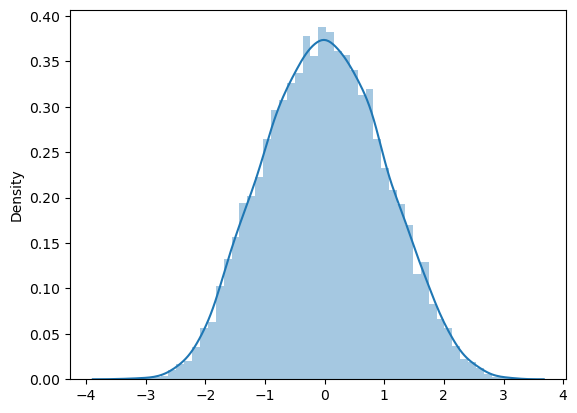

In [17]:
sns.distplot(df_feat,bins=50)

After scaling our data we have a standard normal distributed chart. this can be used as input for our knn model.

In [24]:
X = df_feat
y = df['TARGET CLASS']

In [19]:
from sklearn.model_selection import train_test_split

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)

In [29]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred = knn.predict(X_test)

In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(confusion_matrix(y_test,pred))

[[119  44]
 [ 50 117]]


In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



Let's Employee Elbow method to see if we can improve the efficiency of our model.

In [37]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error_rate')

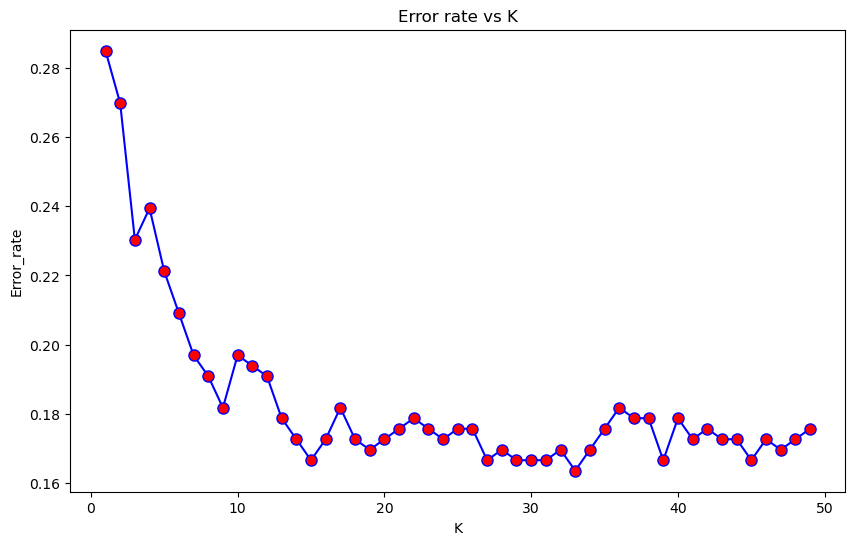

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='-',marker='o',markerfacecolor='red',markersize=8)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error_rate')

We can see our error rate is lowest at around the K value of 30, so lets create a model with k = 30 and Compare the results with our previous model.

In [42]:
knn=KNeighborsClassifier(n_neighbors=30)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [45]:
pred_30 = knn.predict(X_test)

In [46]:
print(confusion_matrix(y_test,pred_30))

[[141  22]
 [ 33 134]]


In [47]:
print(classification_report(y_test,pred_30))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       163
           1       0.86      0.80      0.83       167

    accuracy                           0.83       330
   macro avg       0.83      0.83      0.83       330
weighted avg       0.83      0.83      0.83       330



In [48]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



From above observation we can see that the model accuracy is improved by around 11% by changing the k value to 30.